In [1]:
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
def ParseMDMFile(file):
    print(f"Parsing {file}")
    with open(file,"r") as f:
        k=np.array(f.readlines())
    f.close()    
    cnt2=0
    Values={}
    for i in range(0,len(k)):
        if(k[i]=="BEGIN_DB\n"):
            VD=np.array([])
            ID=np.array([])
            IB=np.array([])
            IG=np.array([])
            mn={"VG":0,"VS":0,"VB":0}
            for v in range(i,len(k)):

                if(k[v]=="END_DB\n"):
                    break
                if(k[v]!="BEGIN_DB\n"):     
                    try:
                        p=np.array(k[v].split(' '))
                        p=p[p!='']
                        if(p[1] in mn):
                            mn[p[1]]=p[2]
                        if(len(p)>4 and p[0]!="#VD"):
                            VD=np.append(VD,p[p!=''][0])
                            ID=np.append(ID,p[p!=''][1])
                            IB=np.append(IB,p[p!=''][2])
                            IG=np.append(IG,p[p!=''][3])
                    except IndexError:
                        ## Skip no worries
                        continue
            print(f"Row {cnt2}, Collected values  for  {mn}")            
            Values[cnt2]={"VD":VD.astype(float),"ID":ID.astype(float),"IB":IB.astype(float),"IG":IG.astype(float),"const":mn}

            cnt2=cnt2+1
    return Values       


In [3]:
v1=ParseMDMFile("sky130_fd_pr__nfet_01v8_w0p36u_l0p15u_m1(8701_9_10_IDVD).mdm")

Parsing sky130_fd_pr__nfet_01v8_w0p36u_l0p15u_m1(8701_9_10_IDVD).mdm
Row 0, Collected values  for  {'VG': '0', 'VS': '0', 'VB': '0'}
Row 1, Collected values  for  {'VG': '0.36', 'VS': '0', 'VB': '0'}
Row 2, Collected values  for  {'VG': '0.72', 'VS': '0', 'VB': '0'}
Row 3, Collected values  for  {'VG': '1.08', 'VS': '0', 'VB': '0'}
Row 4, Collected values  for  {'VG': '1.44', 'VS': '0', 'VB': '0'}
Row 5, Collected values  for  {'VG': '1.8', 'VS': '0', 'VB': '0'}
Row 6, Collected values  for  {'VG': '0', 'VS': '0', 'VB': '-0.9'}
Row 7, Collected values  for  {'VG': '0.36', 'VS': '0', 'VB': '-0.9'}
Row 8, Collected values  for  {'VG': '0.72', 'VS': '0', 'VB': '-0.9'}
Row 9, Collected values  for  {'VG': '1.08', 'VS': '0', 'VB': '-0.9'}
Row 10, Collected values  for  {'VG': '1.44', 'VS': '0', 'VB': '-0.9'}
Row 11, Collected values  for  {'VG': '1.8', 'VS': '0', 'VB': '-0.9'}


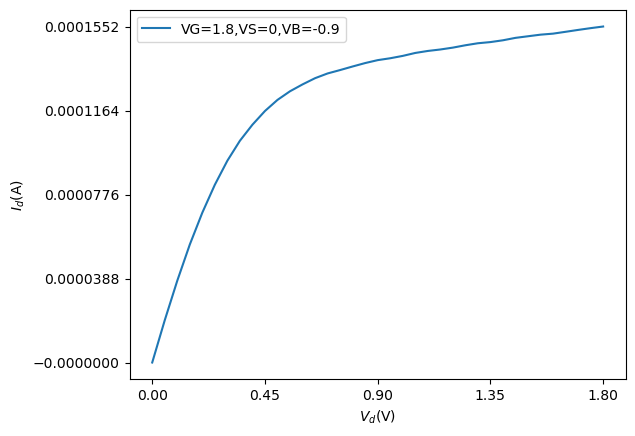

In [4]:
row=11


xticks=np.linspace(np.min(v1[row]["VD"]),np.max(v1[row]["VD"]),5)
yticks=np.linspace(np.min(v1[row]["ID"]),np.max(v1[row]["ID"]),5)
lbl=VG=f'VG={v1[row]["const"]["VG"]},VS={v1[row]["const"]["VS"]},VB={v1[row]["const"]["VB"]}'
plt.plot(v1[row]["VD"],v1[row]["ID"],label=lbl)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel(r'$V_{d}$(V)')
plt.ylabel(r'$I_{d}$(A)')
plt.legend()
plt.show()
